### 机器学习的分类
- 监督学习(Supervised Learning)
  - 从给定的训练数据集中训练出一个函数，然后用这个函数来预测新的结果，一般由人工标注
- 无监督学习(Unsupervised Learning)
  - 训练集没有人标记
- 强化学习(Reinforcement Learning)
  - 通过观察来学习执行什么动作得到最好的回报
- 半监督学习(Semi-supervised Learning)
  - 介于监督学习和无监督学习之间
- 深度学习(Deep Learning)
  - 利用深层神经网络模型抽象数据表示特征

### Scikit-learn库
- 分类，聚类，回归，降维

### 更多学习资料：
- 西瓜书：[https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/MLbook2016.htm](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/MLbook2016.htm)
- PRML：[https://link.springer.com/us/book/9780387310732](https://link.springer.com/us/book/9780387310732)
- 吴恩达机器学习教程[https://zh.coursera.org/learn/machine-learning](https://zh.coursera.org/learn/machine-learning)
- 强化学习：[https://www.davidsilver.uk/teaching/](https://www.davidsilver.uk/teaching/)

#### 无监督学习
- 利用==无标签==的数据学习数据的分布或数据与数据之间的关系，与有监督学习最大的区别在于数据是否有标签。
- 最常用的场景：聚类、降维
  - 聚类：根据数据的“相似性”将数据分为多类，通常是根据样本间的距离来评估样本之间的相似性
    - 欧式距离：两点之间的直线距离
    - 曼哈顿距离：一阶范数
    - 马氏距离：数据的协方差距离
    - 夹角余弦
    - sklearn.cluster：K-Means，近邻传播算法，DBSCAN
  - 降维：在保证数据所具有的代表性特征或者分布的情况下，将高维数据转化为低维数据
    - sklearn.decomposition

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


type 0 ['江苏' '安徽' '湖南' '湖北' '广西' '海南' '四川' '云南']
type 1 ['北京' '上海' '广东']
type 2 ['河北' '山西' '内蒙古' '辽宁' '吉林' '黑龙江' '江西' '山东' '河南' '贵州' '陕西' '甘肃' '青海' '宁夏'
 '新疆']
type 3 ['天津' '浙江' '重庆']
type 4 ['福建' '西藏']


(-1.104637265331525, 1.112479055049164, -1.109015347236326, 1.108100973144363)

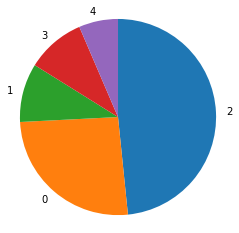

In [21]:
### kmeans聚类分析

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pri_columns = ['city', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8']
pri_data = pd.read_csv("./data/聚类/31省市居民家庭消费水平-city.csv", encoding='gb2312', names=pri_columns)
train_data = pri_data.drop(labels='city', axis=1, inplace=False)

model_n_cluster = 5

model_kmeans = KMeans(n_clusters=model_n_cluster)
model_kmeans.fit(train_data.values)

pri_data['kmeans-type'] = model_kmeans.labels_

for i in range(model_n_cluster):
    city_n_type = pri_data[pri_data['kmeans-type']==i]
    print("type {}".format(i), city_n_type['city'].values)

city_count = pri_data['kmeans-type'].value_counts()
plt.pie(city_count, labels = city_count.index, startangle = 90, counterclock = False)
plt.axis('square')

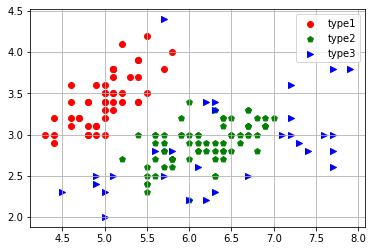

In [31]:
### dbscan聚类分析
from sklearn.cluster import DBSCAN
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

data_iris = load_iris()
df_iris = pd.DataFrame(data=data_iris['data'], columns=data_iris['feature_names'])
df_iris['target'] = data_iris['target']

model_dbscan = DBSCAN(eps=0.5, min_samples=10)
model_dbscan.fit(df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
df_iris['dbscan_labels'] = model_dbscan.labels_
df_iris_dbscan1 = df_iris[df_iris['dbscan_labels'] == 0]
df_iris_dbscan2 = df_iris[df_iris['dbscan_labels'] == 1]
df_iris_dbscan3 = df_iris[df_iris['dbscan_labels'] == -1]
  
plt.figure()
plt.scatter(x=df_iris_dbscan1['sepal length (cm)'].values, y=df_iris_dbscan1['sepal width (cm)'].values, c='red', marker='o', label='type1')
plt.scatter(x=df_iris_dbscan2['sepal length (cm)'].values, y=df_iris_dbscan2['sepal width (cm)'].values, c='green', marker='p', label='type2')
plt.scatter(x=df_iris_dbscan3['sepal length (cm)'].values, y=df_iris_dbscan3['sepal width (cm)'].values, c='blue', marker='>', label='type3')
plt.legend()
plt.grid()

### 数据降维
- 主成分分析(PCA):将具有相关性的高维变量合成为线性无关的低维变量，称为主成分
- 非负矩阵分解(NMF):矩阵中的所有元素均为非负数约束条件下的矩阵分解方法

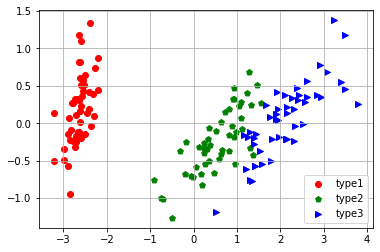

In [37]:
### PCA降维
from sklearn.decomposition import PCA
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

data_iris = load_iris()
df_iris = pd.DataFrame(data=data_iris['data'], columns=data_iris['feature_names'])
df_iris['target'] = data_iris['target']

model_pca = PCA(n_components=2)
X = data_iris['data']
X_new = model_pca.fit_transform(X)

df_iris['pca_x1'] = X_new[:, 0]
df_iris['pca_x2'] = X_new[:, 1]

df_iris1 = df_iris[df_iris['target'] == 0]
df_iris2 = df_iris[df_iris['target'] == 1]
df_iris3 = df_iris[df_iris['target'] == 2]
  
plt.figure()
plt.scatter(x=df_iris1['pca_x1'].values, y=df_iris1['pca_x2'].values, c='red', marker='o', label='type1')
plt.scatter(x=df_iris2['pca_x1'].values, y=df_iris2['pca_x2'].values, c='green', marker='p', label='type2')
plt.scatter(x=df_iris3['pca_x1'].values, y=df_iris3['pca_x2'].values, c='blue', marker='>', label='type3')
plt.legend()
plt.grid()


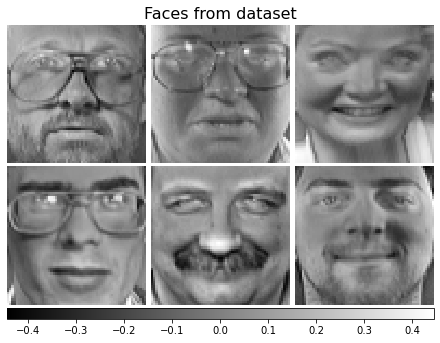

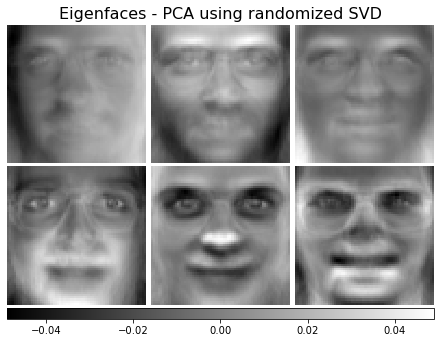

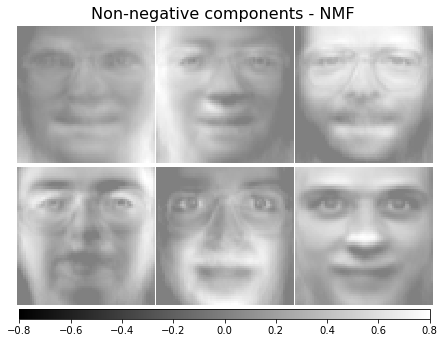

In [74]:
### PCA 和 NMF 图像特征提取
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA, NMF

data_faces = fetch_olivetti_faces(shuffle=True, random_state=np.random.RandomState(0))
np_face_data = data_faces['data']

### 数据中心化
np_face_centered = np_face_data - np_face_data.mean(axis=0)
np_face_centered -= np_face_centered.mean(axis=1).reshape(np_face_data.shape[0], -1)

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

plot_gallery("Faces from dataset", np_face_centered[:n_components])


#### 这两个例子中注意，最后画图展示的是降维结果的主轴方向，降维的结果
### pca降维
pca_estimator = PCA(n_components=n_components, svd_solver="randomized", whiten=True)
pca_estimator.fit(np_face_centered)
plot_gallery("Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components])

### nmf降维
nmf_estimator = NMF(n_components=n_components, tol=5e-3)
nmf_estimator.fit(np_face_data)  # original non- negative dataset
plot_gallery("Non-negative components - NMF", nmf_estimator.components_[:n_components])


### 基于聚类的图像分割
利用K-means算法对图像像素点颜色进行聚类实现简单的图像分割，算法的基本思路：
1. 根据像素点的颜色将像素点进行聚类
2. 根据聚类结果对每类像素点重新设置灰度颜色

### 监督学习
利用一组带有标签的数据，学习从输入到输出的映射，然后将这种映射关系应用到未知数据上预测
- 分类：输出是离散的
- 回归：输出是连续的
- 训练集，测试集
- 分类学习评价指标
  - 精确率
  - 召回率
  - 准确率
- 回归分析

### 交叉验证
将数据集D划分为k个大小相似的互斥子集，每个子集尽可能保持数据的一致性，每次用k-1个子集的并集作为训练集，余下的1个子集作为训练集，这样就可以进行k次训练和测试，最终返回这k个测试结果的均值，通常把这个交叉验证的方法称为“k折交叉验证”

#### 分类问题
三个基本的分类模型：
- k近邻分类器：计算待分类数据点与已有数据集中所有数据的距离，取距离最小的前K个点，将这个数据点划分为出现次数最多的那个类别(sklearn.neighbors.KNeighborsClassifier)
- 决策树分类器：树形结构的分类器，通过顺序询问分类点的属性决定分类点最终的类别，分类时只需要按照决策树中的节点依次进行判断就能得到分类结果(sklearn.tree.DecisionTreeClassifier)
- 朴素贝叶斯分类器：以贝叶斯定理为基础的多分类的分类器(sklearn.naive_bayes.GaussianNB)

In [75]:
### 鸢尾花数据集决策树交叉分类
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

data_iris = load_iris()
clf = DecisionTreeClassifier()
print(cross_val_score(clf, data_iris.data, data_iris.target, cv = 10))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [17]:
### 上证指数涨跌分类，使用SVM算法
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

df_stock = pd.read_csv("./data/分类/stock/000777.csv", encoding='gb2312', parse_dates=[0], index_col=0)
df_stock.sort_index(0, ascending=True, inplace=True)

dayfeature = 150
featurenum = 5*dayfeature
x = np.zeros((df_stock.shape[0]-dayfeature, featurenum+1))
y = np.zeros((df_stock.shape[0]-dayfeature))

############  数据的预处理过程较为复杂

for i in range(df_stock.shape[0]-dayfeature):
    x[i, 0:featurenum]=np.array(df_stock[i:i+dayfeature][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape(1, featurenum)
    x[i, featurenum] = df_stock.iloc[i+dayfeature].loc['开盘价']

for i in range(df_stock.shape[0]-dayfeature):
    if df_stock.iloc[i+dayfeature].loc['收盘价'] >= df_stock.iloc[i+dayfeature].loc['开盘价']:
        y[i] = 1
    else:
        y[i] = 0

clf = SVC(kernel='rbf')
result = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf.fit(x_train, y_train)
    result.append(np.mean(y_test == clf.predict(x_test)))
print(result)

clf2 = SVC(kernel='sigmoid')
result = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf2.fit(x_train, y_train)
    result.append(np.mean(y_test == clf.predict(x_test)))
print(result)

C:\Users\luojun\AppData\Local\Temp\ipykernel_12336\1019115764.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df_stock.sort_index(0, ascending=True, inplace=True)


[0.5211726384364821, 0.5168295331161781, 0.5222584147665581, 0.5331161780673181, 0.5255157437567861]
[0.6167209554831705, 0.6134636264929425, 0.5798045602605864, 0.5765472312703583, 0.5776330076004343]


### 线性回归
回归拟合房价与房屋尺寸的关系

0.7976864844535204


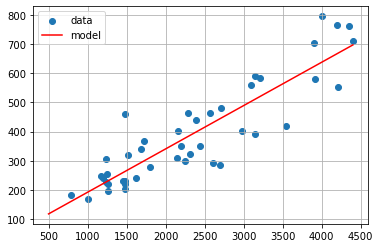

In [13]:
### 线性回归
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pri_columns = ['area', 'price']
df_data = pd.read_csv('./data/回归/prices.csv', names=pri_columns)

area_x = df_data['area'].values
X = [[i] for i in area_x]
y = df_data['price'].values

model = LinearRegression()
model.fit(X, y)
model_x = [[i] for i in range(500, 4500, 100)]
model_y = model.predict(model_x)
print(model.score(X, y))

plt.figure()
plt.grid()
plt.scatter(X, y, label='data')
plt.plot(model_x, model_y, 'r', label='model')
plt.legend()

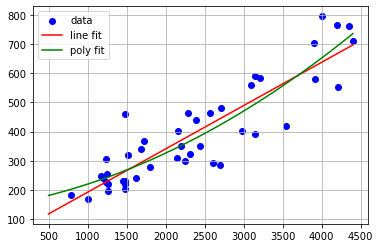

In [17]:
### 多项式回归
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pri_columns = ['area', 'price']
df_data = pd.read_csv('./data/回归/prices.csv', names=pri_columns)

area_x = df_data['area'].values
X = [[i] for i in area_x]
y = df_data['price'].values

Poly_X = PolynomialFeatures(degree=2).fit_transform(X)
line_model = LinearRegression()
poly_model = LinearRegression()

line_model.fit(X, y)
poly_model.fit(Poly_X, y)
model_x = [[i] for i in range(500, 4500, 100)]
poly_model_x = PolynomialFeatures(degree=2).fit_transform(model_x)

plt.figure()
plt.grid()
plt.scatter(X, y, color='blue', label='data')
plt.plot(model_x, line_model.predict(model_x), color='red', label='line fit')
plt.plot(model_x, poly_model.predict(poly_model_x), color='green', label='poly fit')
plt.legend()


0.7582073878823481


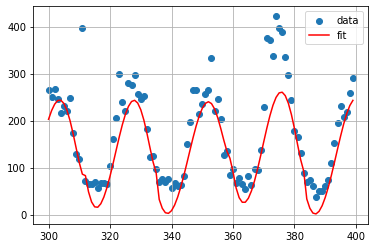

In [36]:
### 岭回归预测车流量
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df_data = pd.read_csv('./data/回归/岭回归.csv')
print()

data_x = df_data[[df_data.columns[1], df_data.columns[2], df_data.columns[3], df_data.columns[4]]].values
data_y = df_data['TRAFFIC_COUNT'].values
poly_x = PolynomialFeatures(degree=6).fit_transform(data_x)

poly_x_train, poly_x_test, poly_y_train, poly_y_test = train_test_split(poly_x, data_y, test_size=0.25, random_state=0)

poly_model = Ridge(alpha=0.1, fit_intercept=False)
poly_model.fit(poly_x_train, poly_y_train)
print(poly_model.score(poly_x_test, poly_y_test))

i_start = 300
i_end = 400
i_dex = range(i_start, i_end, 1)
plot_x = poly_x[i_start:i_end, :]
plot_y = data_y[i_start:i_end]

plt.figure()
plt.grid()
plt.scatter(i_dex, plot_y, label='data')
plt.plot(i_dex, poly_model.predict(plot_x), color='red', label='fit')
plt.legend()

### 基于神经网络的手写数字识别方案

In [38]:
####### 初始数据的读取 #########
import numpy as np
import os

def Img2Vector(filename):
    '''
    将图片信息转换为1024长度的矩阵
    '''
    ret_vec = np.zeros(1024, int)
    with open(filename, 'r') as img_file:
        lines = img_file.readlines()
        for i in range(32):
            for j in range(32):
                ret_vec[i*32+j] = lines[i][j]
    return ret_vec

def ReadDataSet(path):
    '''
    读取数据集
    '''
    file_list = os.listdir(path)
    file_count = len(file_list)
    data_set = np.zeros([file_count, 1024], int)
    hot_labels = np.zeros([file_count, 10])
    for i in range(file_count):
        file_name = file_list[i]
        file_label = int(file_name.split('_')[0])
        hot_labels[i][file_label] = 1.0
        data_set[i] = Img2Vector(path + '/' + file_name)
    return data_set, hot_labels
train_data_set, train_hot_labels = ReadDataSet('./data/手写数字/digits/trainingDigits')
test_data_set, test_hot_labels = ReadDataSet('./data/手写数字/digits/testDigits')

In [40]:
### 神经网络实现手写数字识别案例
from sklearn.neural_network import MLPClassifier
model_mlpc = MLPClassifier(activation='logistic', solver='adam', learning_rate_init=1e-3, max_iter=2000)
model_mlpc.fit(train_data_set, train_hot_labels)
print(model_mlpc.score(test_data_set, test_hot_labels))

0.952431289640592


In [41]:
### KNN分类器实现手写数字识别案例
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
model_knn.fit(train_data_set, train_hot_labels)
print(model_knn.score(test_data_set, test_hot_labels))

0.9862579281183932


#### 对比结论
- KNN的准确率远高于MLP分类器，因为MLP在小数据集上容易过拟合
- MLP对于参数的调整比较敏感，参数的设置对于MLP至关重要
- 对于小数据集，KNN是一个不错的模型

### 强化学习
- 解释：程序或智能体通过与环境不断地进行交互学习一个从环境到动作地映射，学习的目标是使累计回报最大化
- 是一种试错学习，需要在各种状态(环境)下尽量尝试所有可以选择的动作，通过环境给出的反馈(奖励)来判断动作的优劣，最终获得环境和最优动作的映射关系

#### 马尔可夫决策过程(MDP)
智能体根据当前对环境的观察采取动作获得环境的反馈，并使环境发生改变的循环过程。
状态值函数V：执行相应策略后能得到的累计折扣奖励

#### 蒙特卡洛强化学习
在现实的强化学习任务中，环境的转移概率、奖励函数往往很难得知，甚至很难知道环境中有多少状态，如果学习算法不再依赖于环境建模，则称为免模型学习，蒙特卡洛强化学习就是其中一种。

蒙特卡洛强化学习使用多次采样，然后求取平均累计奖赏作为期望累计奖赏的近似。

#### Q-learning算法
结合了动态规划与蒙特卡洛方法的思想，学习更加高效。

### 深度强化学习(DRL)
通过深度神经网络直接学习环境与状态动作值函数Q(s, a)之间的映射关系，简化问题求解。

### 深度Q网络(DQN)
将神经网络和Q-learning结合，利用神经网络近似模拟函数Q(s, a)， 输入是问题的状态(图形)，输出是每个动作a对应的Q值，然后依据Q值大小选择对应的状态执行的动作，已完成控制。

#### 自主学习 Flappy Bird 游戏
训练过程：
1. 观察期(OBSERVE)：程序与模拟器进行交互，随机给出动作，获取模拟器中的状态，将状态转移过程存放在D(Replay Memory)中
2. 探索期(EXPLORE)：程序与模拟器交互的过程中，依据D中存储的历史信息更新网络参数，并随训练过程降低随机探索率$\epsilon$
3. 训练期(TRAIN)：$epsilon$已经很小，不再发生改变，网络参数随着训练过程不断趋于稳定

#### 卷积神经网络
- 卷积操作：使用卷积核与数据进行对应位置的乘积并加和，不断移动卷积核生成卷积后的特征
- 池化操作：对卷积结果进行操作
- 卷积神经网络：把Image矩阵中的每个元素当作一个神经元，那么卷积核就相当于输入神经元和输出神经元之间的链接权重，由此构建而成的网络被称为卷积神经网络
(代码暂时省略)